# LOGISTIC REGRESSION

We will be using the Heart Disease Dataset, with 303 rows and 13 attributes as target columns


Objective - To build a classifier to predict if a patient has heart disease or not using logistic regression

In [2]:
#loading the dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart (6).csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [15]:
df.shape

(303, 14)

In [17]:
#data exploration
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

There are 165 patients who have the heart disease and 138 patients who do not have the heart disease

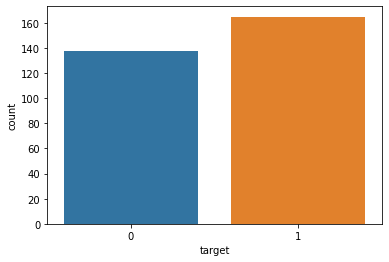

In [19]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df["target"])

In [20]:
#splitting the dataset into features(x) and targets(y) label sets

x = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [22]:
print(x.head())

print(x.shape)

   Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0           1   63    1   3       145   233    1        0      150      0   
1           2   37    1   2       130   250    0        1      187      0   
2           3   41    0   1       130   204    0        0      172      0   
3           4   56    1   1       120   236    0        1      178      0   
4           5   57    0   0       120   354    0        1      163      1   

   oldpeak  slope  ca  
0      2.3      0   0  
1      3.5      0   0  
2      1.4      2   0  
3      0.8      2   0  
4      0.6      2   0  
(303, 13)


In [23]:
print(y.head())

print(y.shape)

   target
0       1
1       1
2       1
3       1
4       1
(303, 1)


In [24]:
#import module from split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)


In [25]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [29]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(xtrain,ytrain)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#predicting the test result
y_pred = logmodel.predict(xtest)

In [31]:
#calculating the accuracy
print("Accuracy:" , (logmodel.score(xtest,ytest)))

Accuracy: 1.0


In [33]:
#evaluating the model with confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(ytest,y_pred)
print(confusion_matrix)

[[30  0]
 [ 0 31]]


In [34]:
(30+31)/(30+31+0+0) 

1.0

The result is telling us that there is 30+31 correct predictions and 0 incorrect prediction

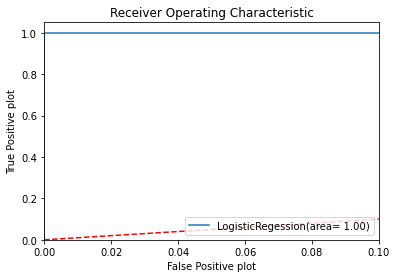

In [36]:
#building the roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest,y_pred)
fpr,tpr,thresholds = roc_curve(ytest,logmodel.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'LogisticRegession(area= %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,0.1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive plot')
plt.ylabel('True Positive plot')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_Roc')
plt.show()

Note : Reciever Operating Charateristic(ROC) curve is used with binary classifiers. The dotted line represent the ROC curve of a purely random classifer. A good classifier stays as far from that line as possible(towards the top left corner)

